In [113]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shutil

In [129]:
discrete = pd.read_csv("results130.csv", delimiter=",")

In [130]:
continuous = pd.read_csv("results_continious.csv", delimiter=",")

# convergence plots

In [131]:
analytics_disc = discrete.groupby(["N", "b"]).est.aggregate([np.mean, np.std])

In [132]:
analytics_disc

mean       std
N     b                       
10    10   31.104725  1.929176
      20   30.526651  1.108007
      50   30.132658  0.424944
      100  30.030727  0.165369
      150  30.008290  0.074850
      200  30.004182  0.047998
      300  30.000692  0.014486
100   10   31.565596  2.459060
      20   30.673427  1.366833
      50   30.190279  0.559046
      100  30.050004  0.226561
      150  30.025584  0.147535
      200  30.010438  0.081100
      300  30.001652  0.024395
1000  10   31.358324  2.289294
      20   30.719224  1.410929
      50   30.248209  0.649534
      100  30.071149  0.299450
      150  30.026259  0.157161
      200  30.012045  0.101686
      300  30.003041  0.043098
10000 10   31.626414  2.611842
      20   30.747809  1.464409

In [133]:
analytics_cont = continuous.groupby(["b"]).est.aggregate([np.mean, np.std])

In [134]:
analytics_cont

,mean,std
b,,
10,31.343697,2.336978
20,30.650291,1.259724
50,30.204270,0.536367


In [135]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [136]:
analytics_disc.index.levels[0]

Int64Index([10, 100, 1000, 10000], dtype='int64', name='N')

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


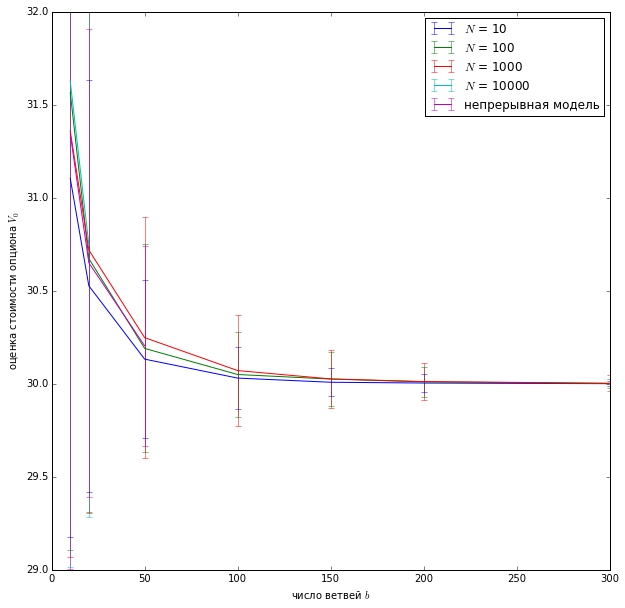

In [137]:
def plot_errorbar(df, label):
    plotline, caplines, barlinecols = plt.errorbar(df.index.tolist(), df["mean"].tolist(), yerr=df["std"].tolist(), label=label)
    for barline in barlinecols:
        barline.set_alpha(0.5)
        
for N in analytics_disc.index.levels[0]:
    plot_errorbar(analytics_disc.loc[N], label="$N$ = {}".format(N))
    
plot_errorbar(analytics_cont, label="непрерывная модель")
# plt.errorbar(analytics_cont.index, analytics_cont["mean"], yerr=analytics_cont["std"], label="continuous")
plt.legend()
# plt.title("Оценки цены Бермудского опциона с 4 моментами исполнения")
plt.ylim((29, 32))
plt.xlabel("число ветвей $b$")
plt.ylabel("оценка стоимости опциона $V_0$")
plt.savefig("130.png")
plt.savefig("130.eps")
shutil.copy("130.eps", "../paper/media/")
plt.show()

# complexity plots

In [138]:
complexity_disc = discrete.groupby(["N", "b"]).ticks.aggregate([np.mean, np.std])

In [139]:
complexity_disc

mean         std
N     b                           
10    10     27.470000    1.059350
      20     29.783000    0.859447
      50     30.938000    0.245390
      100    30.999000    0.031623
      150    31.000000    0.000000
      200    31.000000    0.000000
      300    31.000000    0.000000
100   10    169.167000    4.810848
      20    215.457000    2.653524
      50    240.477000    2.329570
      100   264.461000    3.110974
      150   278.809000    3.205432
      200   287.508000    2.848869
      300   296.093000    2.045124
1000  10    664.006000   24.496654
      20   1332.821000   11.941841
      50   1943.139000   12.420626
      100  2095.994000    2.094362
      150  2140.289000    2.932248
      200  2182.306000    3.935461
      300  2260.401000    5.286790
10000 10   1018.743000   21.118829
      20   5384.139043  111.855825

In [140]:
complexity_cont = continuous.groupby(["b"]).ticks.aggregate([np.mean, np.std])

In [141]:
complexity_cont

,mean,std
b,,
10,11111,0.0
20,168421,0.0
50,6377551,0.0


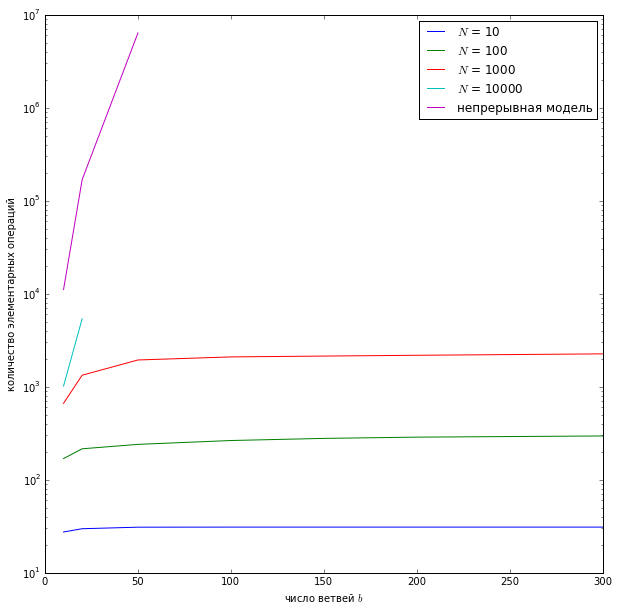

In [142]:
def plot_line(df, label):
    plt.plot(df.index, df["mean"], label=label)
    
for N in complexity_disc.index.levels[0]:
    plot_line(complexity_disc.loc[N], label="$N$ = {}".format(N))
    
plot_line(complexity_cont, label="непрерывная модель")
# plt.errorbar(analytics_cont.index, analytics_cont["mean"], yerr=analytics_cont["std"], label="continuous")
plt.legend()
# plt.title("Количество элементарных операций для оценки Бермудского опциона с 4 моментами исполнения")
plt.yscale("log")
plt.xlabel("число ветвей $b$")
plt.ylabel("количество элементарных операций")
plt.savefig("complexity_130.png")
plt.savefig("complexity_130.eps")
shutil.copy("complexity_130.eps", "../paper/media/")
plt.show()